The Vector functions to simulate the simulations

In [4]:
import math

def calc_lenght(a: list) -> float:
    length: float = 0
    for coord in a:
        length += coord ** 2
    return math.sqrt(length)

def normalise(a: list) -> list:
    lenght: float = calc_lenght(a)
    for i in range(len(a)):
        a[i] /= lenght
    return a

def dot(a: list, b: list) -> float:
    if(len(a) != len(b)): return float('nan')
    dotpr: float = 0
    for i in range(len(a)):
        dotpr += a[i] * b[i]
    return round(dotpr, 10)

def mult(a: list, b: float) -> list:
    x = a[0] * b
    y = a[1] * b
    z = a[2] * b

    return[x, y, z]

def minus(a: list, b: list) -> list:
    x = a[0] - b[0]
    y = a[1] - b[1]
    z = a[2] - b[2]

    return[x, y, z]

def cross(a: list, b: list) -> list:
    x = a[1]*b[2] - a[2]*b[1]
    y = a[2]*b[0] - a[0]*b[2]
    z = a[0]*b[1] - a[1]*b[0]
    
    return[x, y, z]

def rotate_z(a: list, rad: float) -> list:
    x: float = a[0] * math.cos(rad) - a[1] * math.sin(rad)
    y: float = a[0] * math.sin(rad) + a[1] * math.cos(rad)
    z: float = a[2]

    return [x, y, z]

def rotate_y(a: list, rad: float) -> list:
    x: float = a[0] * math.cos(rad) + a[2] * math.sin(rad)
    y: float = a[1]
    z: float = -a[0] * math.sin(rad) + a[2] * math.cos(rad)

    return [x, y, z]

def rotate_x(a: list, rad: float) -> list:
    x: float = a[0]
    y: float = a[1] * math.cos(rad) - a[2] * math.sin(rad)
    z: float = a[1] * math.sin(rad) + a[2] * math.cos(rad)

    return [x, y, z]

gausian functions

In [15]:
def gausian(x_m: float, sig: float) -> float:
    return (1 / (sig * math.sqrt(2 * math.pi))) * math.exp(-0.5 * pow(x_m / sig, 2))

def gausian2(theta_i: float, theta_r: float, alpha: float, beta: float) -> float:
    return (1 / (beta * math.sqrt(2 * math.pi))) * math.exp(-(pow(math.sin(theta_i) + math.sin(theta_r) - alpha, 2) / (2 * pow(beta, 2))))

calculating the m values for a full rotation

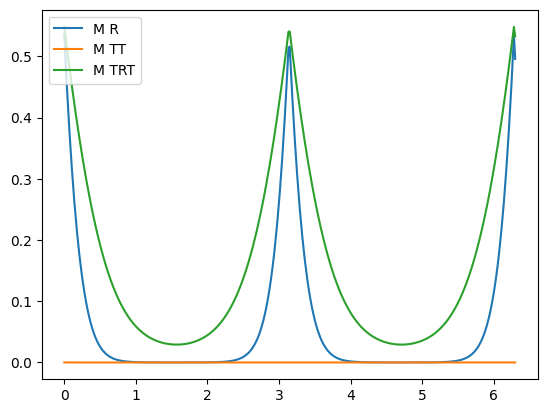

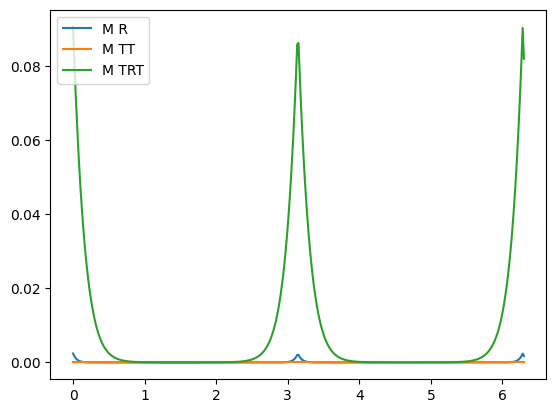

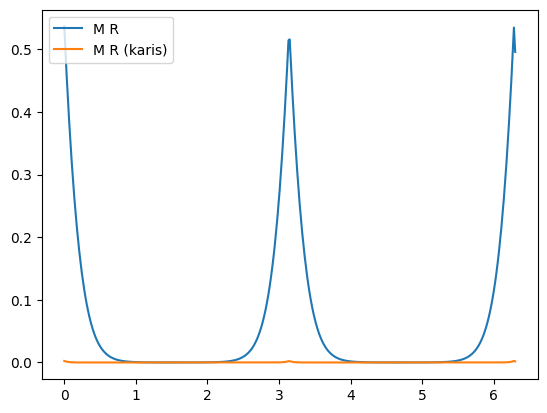

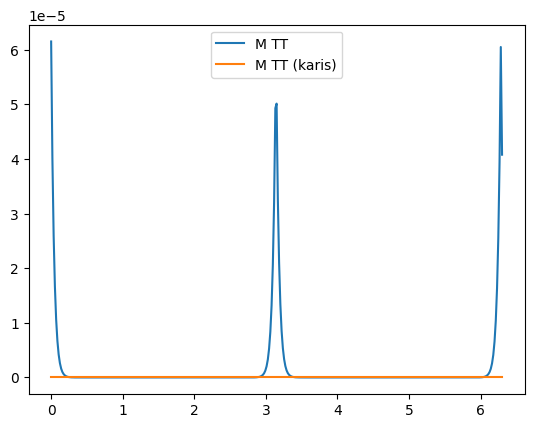

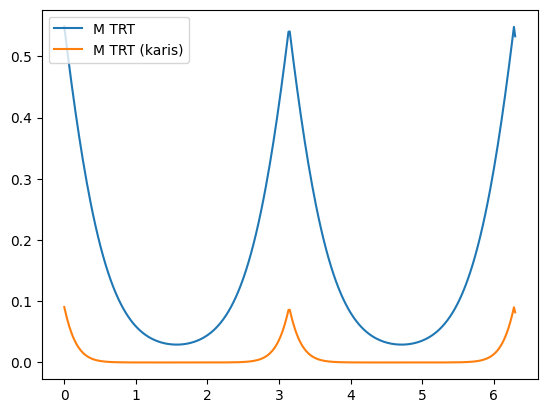

In [20]:
import matplotlib.pyplot as plt

tangent = normalise([0, 0, -1])
light = normalise([1, 1, 1])
view = normalise([1, 1, 0])

long_width_R: float = math.radians(8.0)
long_width_TT: float = long_width_R / 2    
long_width_TRT: float = long_width_R * 2    

long_shift_R: float = math.radians(3.0)   
long_shift_TT: float = -long_shift_R / 2
long_shift_TRT: float = -3 * long_shift_R / 2

rot_angles = []
theta_ds = []
theta_rs = []
theta_is = []

M_R = []
M_TT = []
M_TRT = []

M_R_k = []
M_TT_k = []
M_TRT_k = []

phis = []
total_rot = 0
eta = 1.55
i = 0

while True:
    dotLightTangent: float = dot(light, tangent)
    dotViewTangent: float = dot(view, tangent)
    
    LT_P: list = normalise(minus(light, mult(tangent, dotLightTangent)))
    VT_P: list = normalise(minus(view, mult(tangent, dotViewTangent)))
    
    Normal: list = normalise(LT_P + VT_P)
    Binormal: list = normalise(cross(Normal, tangent))

    theta_r: float = math.acos(dot(VT_P, view))
    theta_i: float = math.acos(dot(LT_P, light))
    theta_d: float = (theta_r - theta_i) / 2
    theta_h: float = (theta_r + theta_i) / 2
    phi_r : float = math.acos(dot(Binormal, VT_P))
    phi_i : float = math.acos(dot(Binormal, LT_P))
    phi : float = phi_r - phi_i
    theta_ds.append(theta_d)
    theta_rs.append(theta_r)
    theta_is.append(theta_i)
    phis.append(phi)
    rot_angles.append(total_rot)
    
    M_R.append(gausian(theta_h - long_shift_R, long_width_R))
    M_TT.append(gausian(theta_h - long_shift_TT, long_width_TT))
    M_TRT.append(gausian(theta_h - long_shift_TRT, long_width_TRT))

    M_R_k.append(gausian2(theta_i, theta_r, long_shift_R, long_width_R))
    M_TT_k.append(gausian2(theta_i, theta_r, long_shift_TT, long_width_TT))
    M_TRT_k.append(gausian2(theta_i, theta_r, long_shift_TRT, long_width_TRT))
    # phis.append(theta_d)

    if total_rot > math.pi * 2 or i == 3000: break
    view = normalise(rotate_x(view, 0.0175))
    total_rot += 0.0175
    i += 1

plt.plot(rot_angles, M_R, label = "M R") 
plt.plot(rot_angles, M_TT, label = "M TT") 
plt.plot(rot_angles, M_TRT, label = "M TRT") 
plt.legend() 
plt.show()

plt.plot(rot_angles, M_R_k, label = "M R") 
plt.plot(rot_angles, M_TT_k, label = "M TT") 
plt.plot(rot_angles, M_TRT_k, label = "M TRT") 
plt.legend() 
plt.show()

plt.plot(rot_angles, M_R, label = "M R") 
plt.plot(rot_angles, M_R_k, label = "M R (karis)")
plt.legend() 
plt.show()

plt.plot(rot_angles, M_TT, label = "M TT") 
plt.plot(rot_angles, M_TT_k, label = "M TT (karis)") 
plt.legend() 
plt.show()

plt.plot(rot_angles, M_TRT, label = "M TRT") 
plt.plot(rot_angles, M_TRT_k, label = "M TRT (karis)") 
plt.legend() 
plt.show()